| **Chapter**                   | 2:  Simple compartmental models                       |
| ----------------------------- | ----------------------------------------------------- |
| **Computational Note**        | 2.x: Time and phase                                   |
| **Package prerequisites**     | None                                                  |


# Time and phase

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
import sympy

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

In [3]:
def deriv(t, y, beta, gamma, mu):
    S, I, R = y

    N = S + I + R

    dSdt = mu - beta * S * I - mu * S
    dIdt = beta * S * I - gamma * I - mu * I
    dRdt = gamma * I - mu * R

    return dSdt, dIdt, dRdt

In [4]:
I_0 = 1e-3
S_0 = 1 - I_0
R_0 = 0

y_0 = (S_0, I_0, R_0)

R0 = 3.5
tau = 5
gamma = 1/tau
mu = 0.02
beta = R0 * (gamma + mu)

In [5]:
res = solve_ivp(fun=deriv, t_span = (0, 100), y0=y_0, args=(beta, gamma, mu), method="LSODA")

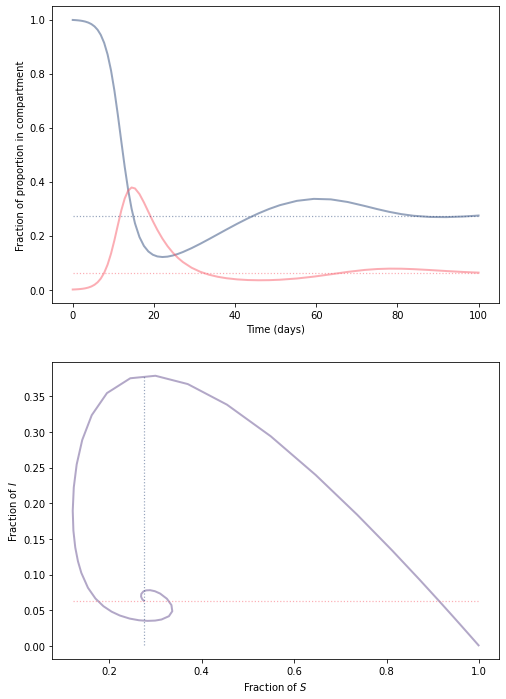

In [6]:
S, I, R = res.y

fig = plt.figure(facecolor="w", figsize=(8, 12))
ax = fig.add_subplot(211, axisbelow=True)

ax.plot(res.t, S, color=COLORS["S"], alpha=0.5, lw=2, label="Susceptible")
ax.plot(res.t, I, color=COLORS["I"], alpha=0.5, lw=2, label="Infectious")
# ax.plot(res.t, R, color=COLORS["R"], alpha=0.5, lw=2, label="Recovered")
ax.hlines(S[-1], xmin=res.t[0], xmax=res.t[-1], color=COLORS["S"], alpha=0.5, lw=1.2, linestyles=":", label="Endemic susceptible equilibrium")
ax.hlines(I[-1], xmin=res.t[0], xmax=res.t[-1], color=COLORS["I"], alpha=0.5, lw=1.2, linestyles=":", label="Endemic infectious equilibrium")
ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of proportion in compartment")

ax = fig.add_subplot(212, axisbelow=True)
ax.plot(S, I, color=COLORS["X"], alpha=0.5, lw=2)
ax.hlines(I[-1], xmin=min(S), xmax=max(S), color=COLORS["I"], alpha=0.5, lw=1.2, linestyles=":", label="Endemic infectious equilibrium")
ax.vlines(S[-1], ymin=min(I), ymax=max(I), color=COLORS["S"], alpha=0.5, lw=1.2, linestyles=":", label="Endemic susceptible equilibrium")
ax.set_xlabel("Fraction of $S$")
ax.set_ylabel("Fraction of $I$")

## Identify fixed points symbolically

In [7]:
S, I, R, N, beta, gamma, mu = sympy.symbols("S, I, R, N, beta, gamma, mu")

In [8]:
dSdt = mu - beta * S * I - mu * S
dIdt = beta * S * I - gamma * I - mu * I

In [9]:
dSzero = sympy.Eq(dSdt, 0)
dIzero = sympy.Eq(dIdt, 0)

In [10]:
equilibria = sympy.solve((dSzero, dIzero), S, I)
print(equilibria)

[(1, 0), (-(-mu + mu*(beta - gamma - mu)/beta)/mu, mu*(beta - gamma - mu)/(beta*(gamma + mu)))]


In [11]:
equilibria[1][0].subs([(mu, 1e-1), (beta, R0 * 1/tau), (gamma, 1/tau)])

In [12]:
equilibria[1][1].subs([(mu, 1e-1), (beta, R0 * 1/tau), (gamma, 1/tau)])

## Adding a quiver plot

<ipython-input-13-4a24725ed327>:34: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(S, I, dS, levels=[0], linewidths=1, alpha=0.4, color=COLORS["E"])
<ipython-input-13-4a24725ed327>:35: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(S, I, dI, levels=[0], linewidths=1, alpha=0.4, color=COLORS["R"])


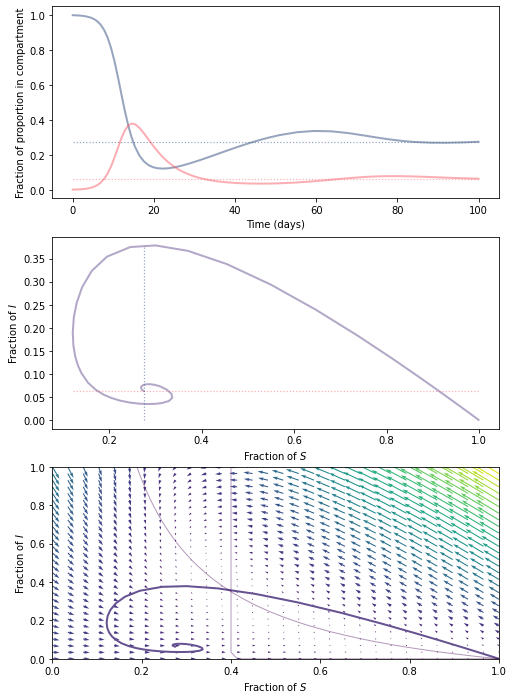

In [13]:
S, I, R = res.y

fig = plt.figure(facecolor="w", figsize=(8, 12))
ax = fig.add_subplot(311, axisbelow=True)

ax.plot(res.t, S, color=COLORS["S"], alpha=0.5, lw=2, label="Susceptible")
ax.plot(res.t, I, color=COLORS["I"], alpha=0.5, lw=2, label="Infectious")
ax.hlines(S[-1], xmin=res.t[0], xmax=res.t[-1], color=COLORS["S"], alpha=0.5, lw=1.2, linestyles=":", label="Endemic susceptible equilibrium")
ax.hlines(I[-1], xmin=res.t[0], xmax=res.t[-1], color=COLORS["I"], alpha=0.5, lw=1.2, linestyles=":", label="Endemic infectious equilibrium")
ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of proportion in compartment")

ax = fig.add_subplot(312, axisbelow=True)
ax.plot(S, I, color=COLORS["X"], alpha=0.5, lw=2)
ax.hlines(I[-1], xmin=min(S), xmax=max(S), color=COLORS["I"], alpha=0.5, lw=1.2, linestyles=":", label="Endemic infectious equilibrium")
ax.vlines(S[-1], ymin=min(I), ymax=max(I), color=COLORS["S"], alpha=0.5, lw=1.2, linestyles=":", label="Endemic susceptible equilibrium")
ax.set_xlabel("Fraction of $S$")
ax.set_ylabel("Fraction of $I$")

ax = fig.add_subplot(313, axisbelow=True)
grid_s, grid_i = np.linspace(0, 1, 30), np.linspace(0, 1, 30)
S, I = np.meshgrid(grid_s, grid_i)
R0 = 6
tau = 14
gamma = 1/tau
beta = R0 * gamma
mu = 1e-1
dS = mu - beta * S * I - mu * S
dI = beta * S * I - gamma * I - mu * I
m = np.hypot(dS, dI)

ax.quiver(S, I, dS, dI, m)
ax.plot(res.y[0], res.y[1], color=COLORS["X"], alpha=1.0, lw=2)
ax.contour(S, I, dS, levels=[0], linewidths=1, alpha=0.4, color=COLORS["E"])
ax.contour(S, I, dI, levels=[0], linewidths=1, alpha=0.4, color=COLORS["R"])
ax.set_xlabel("Fraction of $S$")
ax.set_ylabel("Fraction of $I$")
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)

plt.savefig("phase_space_with_quiver_plot.pdf")